# Creating Pixel Segmentation Labels

The CrowdAI dataset uses classic MSCOCO format & python tooling to manage their seg labels. We follow their tutorial [here](https://github.com/crowdAI/mapping-challenge-starter-kit/blob/master/Dataset%20Utils.ipynb#Visualizing-Annotations) to create the numpy labels.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'axes.grid':False})
import numpy as np
import torch, cv2, gdal, georaster
import sys, os, json, math
from pytorch_utils.eval import read_model, flip
from nbutils import thresh, score_pred, load_img, make_input_tensor, predict_on_file, get_saliency_big, plot_poly
from config import Config
import skimage.io as io
from tqdm import tqdm
from pycocotools.coco import COCO
from pycocotools import mask as cocomask
%matplotlib inline

In [2]:
crowddir='/datasets/CrowdAI/Train/'
datadir=crowddir+'images/'
lbl_big = crowddir+'annotation.json'
lbl_small = crowddir+'annotation-small.json'

In [3]:
coco = COCO(lbl_big)

loading annotations into memory...
Done (t=27.07s)
creating index...
index created!


In [5]:
category_ids = coco.loadCats(coco.getCatIds())
image_ids = coco.getImgIds(catIds=coco.getCatIds())

100%|██████████| 10/10 [00:00<00:00, 22.63it/s]


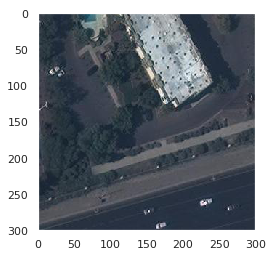

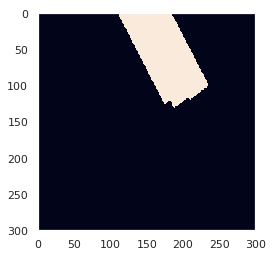

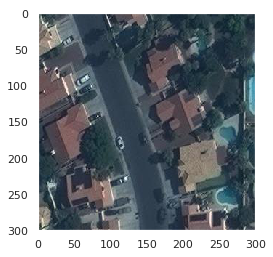

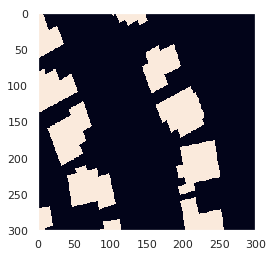

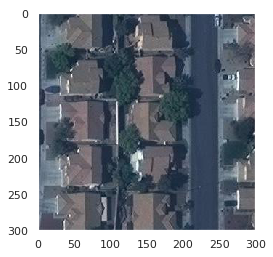

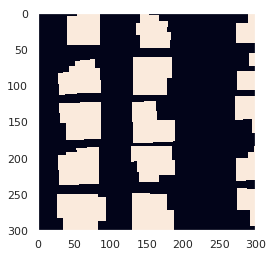

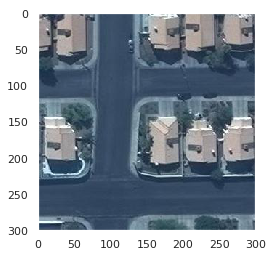

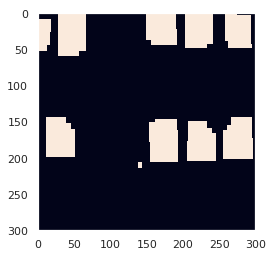

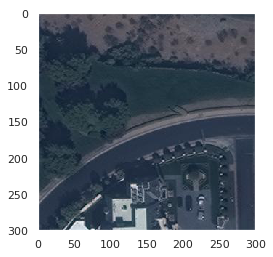

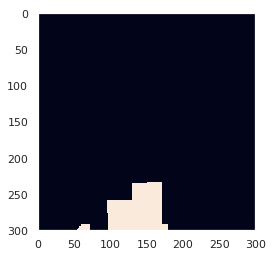

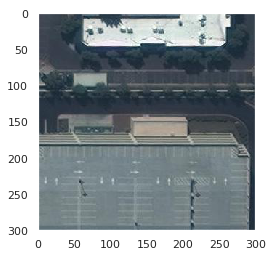

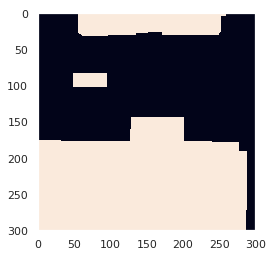

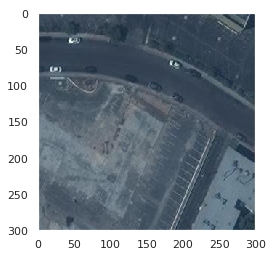

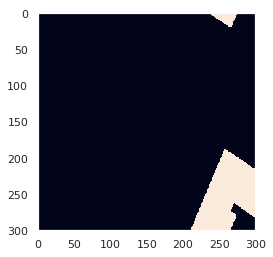

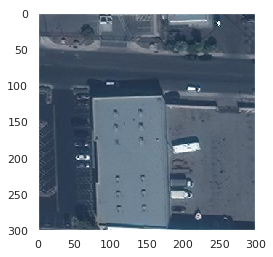

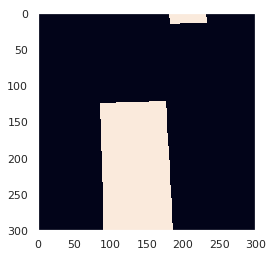

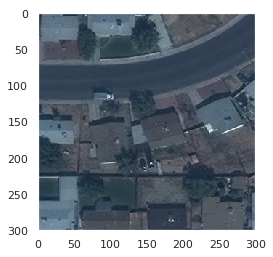

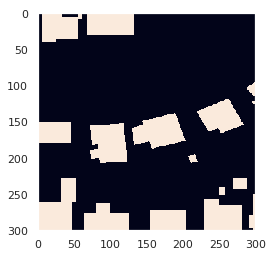

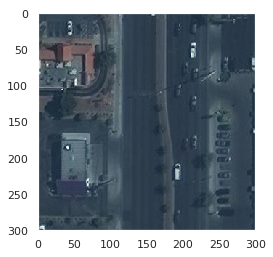

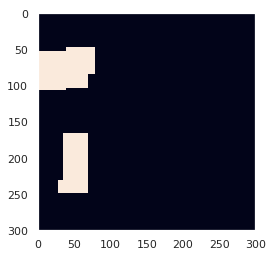

In [6]:
for img_id in tqdm(image_ids[:10]):
    img = coco.loadImgs([img_id])[0]
    image_path = os.path.join(datadir, img["file_name"])
    I = io.imread(image_path)
    annotation_ids = coco.getAnnIds(imgIds=img['id'])
    annotations = coco.loadAnns(annotation_ids)
    lbl = np.zeros((300, 300))
    for a in annotations:
        rle = cocomask.frPyObjects(a['segmentation'], img['height'], img['width'])
        m = cocomask.decode(rle)
        # m.shape has a shape of (300, 300, 1)
        # so we first convert it to a shape of (300, 300)
        m = m.reshape((img['height'], img['width']))
        lbl = lbl + m
    plt.figure()
    plt.imshow(I)
    plt.figure()
    plt.imshow(lbl)

In [19]:
coco.loadImgs([random_image_id])

[{'id': 27046, 'file_name': '000000027046.jpg', 'width': 300, 'height': 300}]

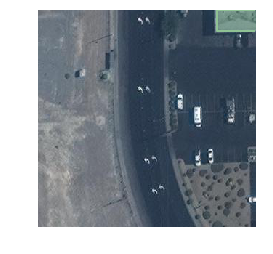

In [9]:
random_image_id = np.random.choice(image_ids)
img = coco.loadImgs([random_image_id])[0]
img

image_path = os.path.join(datadir, img["file_name"])
I = io.imread(image_path)
plt.imshow(I)

annotation_ids = coco.getAnnIds(imgIds=img['id'])
annotations = coco.loadAnns(annotation_ids)

plt.axis('off')
# Render annotations on top of the image
coco.showAnns(annotations)

rle = cocomask.frPyObjects(annotations[0]['segmentation'], img['height'], img['width'])
m = cocomask.decode(rle)
# m.shape has a shape of (300, 300, 1)
# so we first convert it to a shape of (300, 300)
m = m.reshape((img['height'], img['width']))
plt.figure()
plt.imshow(m)